In [1]:
!pip install import-ipynb
import import_ipynb
import pandas as pd
from tensorflow.contrib import learn
from IPython import embed
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=0779b47b87af8aa4d197bdf97ef977f59b3c151fe74f78a0098d12492c9dd2b5
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


# **Build Vocabulary**

In [2]:
gdd.download_file_from_google_drive(file_id='1KbgCHcG_wvEGpM_prVmFXn2fDSCvURhI', dest_path='./processda1.zip', unzip=True)
good_df='good_Sentiment Analysis Dataset.csv'
bad_df='bad_Sentiment Analysis Dataset.csv'

Unzipping...Done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Shared_Folder/Sentiment_Analysis'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Shared_Folder/Sentiment_Analysis


In [4]:
import batchgen
import Pre_Embedding

importing Jupyter notebook from batchgen.ipynb
     |████████████████████████████████| 645kB 2.8MB/s 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,300 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading

Using TensorFlow backend.


In [0]:
%cd '/content/'

/content


In [0]:

batchgen.separate_dataset("Sentiment Analysis Dataset.csv")

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [0]:
%cd '/content'
x,y=batchgen.get_dataset(good_df,bad_df,1000000,randomize=True)

/content


In [0]:
%cd '/content/drive/My Drive/'
np.save('x_index.npy', x)

np.save('y_index.npy', y)

In [5]:
%cd '/content/drive/My Drive/'
x = np.load('x_index.npy')
y = np.load('y_index.npy')
%cd '/content/'

/content/drive/My Drive
/content


In [0]:
x_train, x_valid1 , y_train, y_valid1  = train_test_split(x, y, test_size=0.2, random_state=2019)
x_valid , x_test , y_valid , y_test = train_test_split(x_valid1, y_valid1, test_size=0.5, random_state=2018)

In [0]:
word_to_index, index_to_word, word_to_vec_map,count = Pre_Embedding.read_glove_vecs('/content/drive/My Drive/Shared_Folder/Sentiment_Analysis/Data/glove.twitter.27B.50d.txt')


In [8]:
num_words = [len(x.split()) for x in x]
print('The total number of samples is', x_train.shape[0])
print('The total number of words in the files is', sum(num_words))
print('The average number of words in the files is', sum(num_words)/len(num_words))

The total number of samples is 1262901
The total number of words in the files is 25044961
The average number of words in the files is 15.865027647443


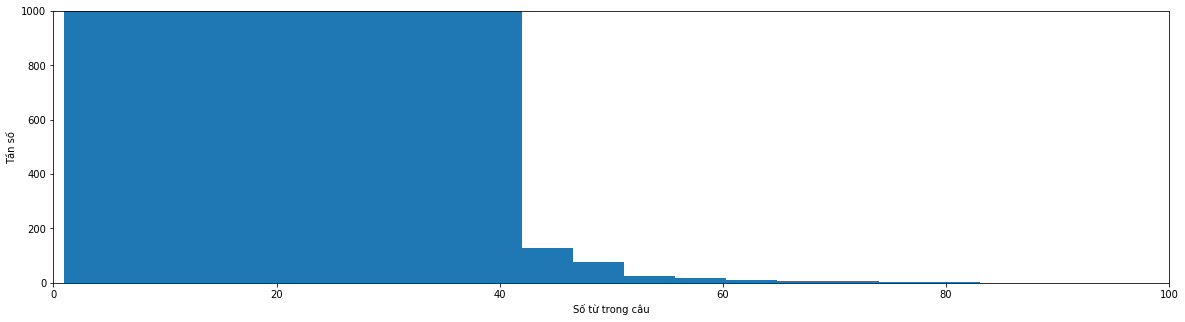

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[20,5])
plt.hist(num_words, 50)
plt.xlabel('Số từ trong câu')
plt.ylabel('Tần số')
plt.axis([0, 100, 0, 1000])
plt.show()

In [0]:
max_document_length = max([len(x.split(" ")) for x in x])

In [0]:
max_document_length =82

In [0]:
x_train = Pre_Embedding.sentence_to_index(x_train,max_document_length,word_to_index)
x_valid = Pre_Embedding.sentence_to_index(x_valid,max_document_length,word_to_index)

In [13]:
len(word_to_index)

1193513

## **Build Model**

In [0]:
import numpy as np
np.random.seed(0)
import keras
from keras.models import Model 
from keras.layers import Dense, Input, Dropout, LSTM, Activation,Conv1D,GlobalMaxPooling1D,CuDNNLSTM,GlobalAveragePooling1D,Concatenate,Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from Pre_Embedding import Embedding_layer
np.random.seed(1)

In [0]:
kernel_size = 3
filters = 64
pool_size = 4
# LSTM
lstm_output_size = 128
lstm_units = 128
n_layers = 1
# Training
batch_size = 256
epochs = 50
rate = 0.25
def Sentiment_Model(input_shape,word_to_idex,word_to_vec_map):

  sentence_index=Input(input_shape,dtype='int32')
  embedding_layer= Embedding_layer(word_to_vec_map, word_to_index,count)

  # Start model:
  x= embedding_layer(sentence_index)
  for i in range(n_layers):
    x = CuDNNLSTM(units=lstm_units, return_sequences = True)(x)
    x = Dropout(rate=rate)(x)
  x = CuDNNLSTM(units=lstm_units, return_sequences = True)(x)

  a1 = GlobalMaxPooling1D()(x)
  a2 = GlobalAveragePooling1D()(x)
  x = Concatenate(axis=-1)([a1,a2])
  x= Dense(units=128, activation='relu')(x)
  x=Dense(1)(x)
  x=Activation('sigmoid')(x)  
    # Create Model instance which converts sentence_indices into X.
  model = Model(inputs=sentence_index, outputs=x)
    
    ### END CODE HERE ###
    
  return model

def Sentiment_Model2(input_shape,word_to_idex,word_to_vec_map):

  sentence_index=Input(input_shape,dtype='int32')
  embedding_layer= Embedding_layer(word_to_vec_map, word_to_index,count)

  # Start model:
  x= embedding_layer(sentence_index)
  left = CuDNNLSTM(units=lstm_units, return_sequences = True)(x)
  right = CuDNNLSTM(units=lstm_units, return_sequences = True,go_backwards=True)(x)
  x_concat= Concatenate(axis=-1)([left,right])
  x = CuDNNLSTM(units=lstm_units, return_sequences = True)(x_concat)
  x = Dropout(rate=rate)(x)
  x = CuDNNLSTM(units=lstm_units, return_sequences = True)(x)

  a1 = GlobalMaxPooling1D()(x)
  a2 = GlobalAveragePooling1D()(x)
  x = Concatenate(axis=-1)([a1,a2])
  x= Dense(units=128, activation='relu')(x)
  x=Dense(1)(x)
  x=Activation('sigmoid')(x)  
    # Create Model instance which converts sentence_indices into X.
  model = Model(inputs=sentence_index, outputs=x)
    
    ### END CODE HERE ###
    
  return model








In [21]:

model = Sentiment_Model2((max_document_length,), word_to_index, word_to_vec_map)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 82)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 82, 50)       59675750    input_3[0][0]                    
__________________________________________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)        (None, 82, 128)      92160       embedding_3[0][0]                
__________________________________________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)        (None, 82, 128)      92160       embedding_3[0][0]                
____________________________________________________________________________________________

In [0]:
  toan = keras.callbacks.ModelCheckpoint("my_model.h5", monitor="val_acc", verbose=1,mode='max',save_best_only=True)
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print('Train...')
  hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (x_valid, y_valid),callbacks=[toan])
  core, acc = model.evaluate(x_test, y_test, batch_size=batch_size)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...


Train on 1262901 samples, validate on 157863 samples
Epoch 1/50
1262901/1262901 [==============================] - 585s 463us/step - loss: 0.4393 - acc: 0.7924 - val_loss: 0.3997 - val_acc: 0.8174

Epoch 00001: val_acc improved from -inf to 0.81745, saving model to my_model.h5
Epoch 2/50
1262901/1262901 [==============================] - 581s 460us/step - loss: 0.3875 - acc: 0.8241 - val_loss: 0.3756 - val_acc: 0.8304

Epoch 00002: val_acc improved from 0.81745 to 0.83039, saving model to my_model.h5
Epoch 3/50
1262901/1262901 [==============================] - 581s 460us/step - loss: 0.3667 - acc: 0.8358 - val_loss: 0.3644 - val_acc: 0.8366

Epoch 00003: val_acc improved from 0.83039 to 0.83657, saving model to my_model.h5
Epoch 4/50
1262901/1262901 [==============================] - 579s 459us/step - loss: 0.3527 - acc: 0.8435 - val_loss: 0.3588 - val_acc: 0.8402

Epoch 00004: v

# **Visualization**

In [0]:

Pre_Embedding.visualize(hist)

NameError: ignored

# **Prediction**

In [0]:
from Pre_Embedding import predict_sentence

# Load model đã lưu trước đó trong quá trình huấn luyện
model.load_weights('my_model.h5')
print("Model đã được load")

In [0]:

%cd '/content/drive/My Drive'

In [0]:
model.load_weights('my_model.h5')

In [0]:
sentence=['i just want to ']
sentence=np.array(sentence)
predict_sentence(model,sentence,word_to_sindex,max_document_length)